In [18]:
import pywt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from  matplotlib.pyplot import figure

mydata = pd.read_csv("FinalData.csv")

lst = mydata.iloc[0].to_numpy()
lst = lst[1:]

mydata = mydata.T # transpose of the data frame
# print(mydata)

ind = mydata.index.values.tolist()
ind = ind[1:]

# print (ind)
# print (lst)



In [19]:

(cA, cD) = pywt.dwt(lst, 'db2', 'smooth') # using db2 wavelet function to decompose data 
A = pywt.idwt(cA, None, 'db2', 'smooth') # using inverse wavelet to reconstruct linear components
D = pywt.idwt(None, cD, 'db2', 'smooth') # using inverse wavelet to reconstruct non-linear components
# lst_rec = A + D # reconstruction of lst i.e data before decomposition


           data  linear components  non-linear components
7/1/2015     18          17.108253               0.891747
7/2/2015     11           9.455449               1.544551
7/3/2015      5          11.256570              -6.256570
7/4/2015     13          10.524519               2.475481
7/5/2015     14           9.921956               4.078044
7/6/2015      9           9.284696              -0.284696
7/7/2015      9          15.319070              -6.319070
7/8/2015     22          19.565785               2.434215
7/9/2015     26          22.901924               3.098076
7/10/2015    24          26.482051              -2.482051
7/11/2015    19          17.029006               1.970994
7/12/2015    10          11.068190              -1.068190
7/13/2015    14          13.391747               0.608253
7/14/2015    15          13.495513               1.504487
7/15/2015     8          12.962019              -4.962019
7/16/2015    16          12.599279               3.400721
7/17/2015     

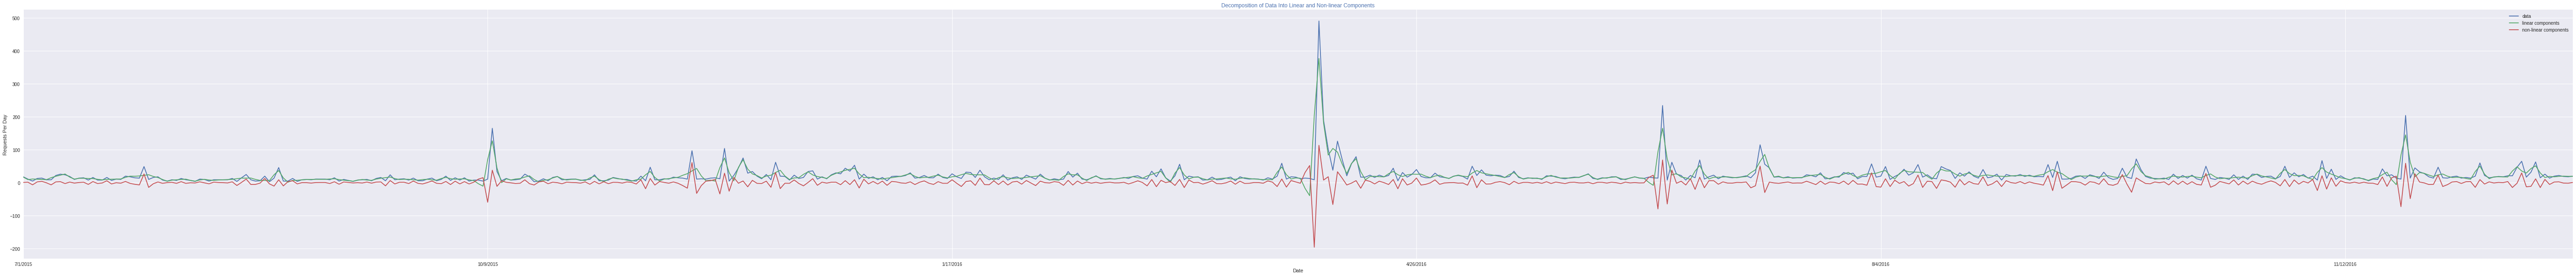

In [20]:
d = {'data': lst, 'linear components': A, 'non-linear components': D} # constructing map with non-decomposed and decomposed data
df = pd.DataFrame(d) # map -> data frame
df.index = ind 

print (df)


# figure(num=None, figsize=(100, 10), dpi=80, facecolor='w', edgecolor='k')
pl = df.plot(figsize=(100, 10), grid=True)
plt.xlabel('Date')
plt.ylabel('Requests Per Day')

mpl.style.use('seaborn')
pl.set_title('Decomposition of Data Into Linear and Non-linear Components'.format('seaborn'), color='C0')


pl.legend()

plt.show()

predicted=8.851302, expected=11.628607
rmse = 2.777304890057783
predicted=20.164898, expected=16.688702
rmse = 3.146216640239331
predicted=13.827142, expected=16.496715
rmse = 2.995773630284031
predicted=20.734634, expected=17.408494
rmse = 3.0816873328312386
predicted=15.426543, expected=18.024519
rmse = 2.991209357861133
predicted=22.752152, expected=16.241025
rmse = 3.81076180220118
predicted=12.542789, expected=15.100481
rmse = 3.658126419997184
predicted=20.225745, expected=17.350481
rmse = 3.5696702906945417
predicted=16.157484, expected=18.691987
rmse = 3.4699355397557703
predicted=21.545809, expected=30.337577
rmse = 4.3088196076550105
predicted=36.695001, expected=39.222196
rmse = 4.178363972881167
predicted=29.598222, expected=64.659460
rmse = 10.883230275923653
predicted=83.248169, expected=85.661456
rmse = 10.477669925455604
predicted=48.934353, expected=43.092387
rmse = 10.216544515711549
predicted=15.100305, expected=17.557133
rmse = 9.890483469160904
predicted=30.547540,

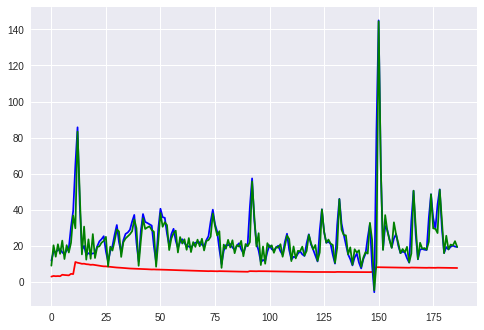

In [21]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

# load dataset
# split into train and test sets
# X -> series values
# X = A[:100]
X = A
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
accuracy = list()
rmse = list()
# rolling forecast
for t in range(len(test)):
	model = ARIMA(history, order=(0, 1, 12))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
	# print ('t = ' + str(t) + ' len = ', str(len(predictions)))
	rmse.append(sqrt(mean_squared_error(test[:len(predictions)], predictions)))
	print ('rmse = ' + str(rmse[len(rmse)-1]))
	# accuracy[t] = sqrt(mean_squared_error(yhat, obs))
# evaluate forecasts
pyplot.plot(rmse, color='red')
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes validation
pyplot.plot(test, color = 'blue')
pyplot.plot(predictions, color='green')
pyplot.plot(rmse, color='red')
pyplot.show()